In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import string
import spacy
import re

In [2]:
#Reading the dataset
dataframe = pd.read_csv('/content/music_album_reviews.csv')

In [3]:
#Loading into the dataframe
df = pd.DataFrame(dataframe)

In [4]:
print(df)

                                                  Review  Rating
0      i think i actually under-rate ok computer if a...     5.0
1      i get why radiohead rub a lot of people the wr...     5.0
2      i would like to think i am good about not lett...     4.5
3      there are radiohead devotees like there were o...     4.0
4      i wrote a shining excellent review for this al...     5.0
...                                                  ...     ...
80266  my favorites here are the steamy lady cab driv...     3.0
80267  prince would have been well-advised to make th...     4.5
80268  you know you cannot say its not a classic beca...     3.5
80269                          the classic prince album.     5.0
80270  i do not like funk and i do not like prince. t...     1.0

[80271 rows x 2 columns]


In [5]:
print(df.shape)
df.Rating.value_counts(normalize = True)

(80271, 2)


5.0    0.377735
4.5    0.227570
4.0    0.181782
3.5    0.090143
3.0    0.056659
2.5    0.028266
2.0    0.017855
1.5    0.008186
1.0    0.006715
0.5    0.005090
Name: Rating, dtype: float64

In [6]:
#Counting  the number of missing ratings
count_missing_values = df['Rating'].isna().sum()
print("Number of missing values in 'Rating column':", count_missing_values)

Number of missing values in 'Rating column': 2084


In [7]:
#Counting  the number of missing reviews
count_missing_reviews = df['Review'].isna().sum()
print("Number of missing values in 'Review column':", count_missing_reviews)

Number of missing values in 'Review column': 26


In [8]:
# Handle missing values
df.dropna(subset=['Review', 'Rating'], inplace=True)

In [9]:
df.dtypes

Review     object
Rating    float64
dtype: object

In [10]:
df['Review'] = df['Review'].astype(str)
df['Rating'] = df['Rating'].astype(str)

In [11]:
review_column_type = df['Review'].dtype
print("Data type of 'Review' column:", review_column_type)


Data type of 'Review' column: object


In [12]:
rating_column_type = df['Rating'].dtype
print("Data type of 'Rating' column:", rating_column_type)

Data type of 'Rating' column: object


In [13]:
#Remove punctutation marks
def clean_text(x):

    x = str(x)
    for punct in '/-&â€–?!.,â€™"#$%Ã©\'()*+-/:;<=>@\\^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

In [14]:
from tqdm import tqdm
tqdm.pandas()
df["Review"] = df["Review"].progress_apply(lambda x: clean_text(x))
# sentences = df["Review"].apply(lambda x: x.split())

100%|██████████| 78162/78162 [00:02<00:00, 26437.69it/s]


In [15]:
print(df)

                                                  Review Rating
0      i think i actually underrate ok computer if an...    5.0
1      i get why radiohead rub a lot of people the wr...    5.0
2      i would like to think i am good about not lett...    4.5
3      there are radiohead devotees like there were o...    4.0
4      i wrote a shining excellent review for this al...    5.0
...                                                  ...    ...
80266  my favorites here are the steamy lady cab driv...    3.0
80267  prince would have been welladvised to make thi...    4.5
80268  you know you cannot say its not a classic beca...    3.5
80269                           the classic prince album    5.0
80270  i do not like funk and i do not like prince th...    1.0

[78162 rows x 2 columns]


In [16]:
# define regular expressions for numbers and links
num_regex = r'\d+' # matches one or more digits
link_regex = r'https?://\S+' # matches http or https followed by any non-space characters

# remove numbers and links from the text column
df['Review'] = df['Review'].apply(lambda x: re.sub(num_regex, '', x))
df['Review'] = df['Review'].apply(lambda x: re.sub(link_regex, '', x))

In [17]:
#Remove Urls
if 'http' not in df['Review'].values and 'https' not in df['Review'].values:
    print('URLs have been successfully removed')
else:
    print('URLs have not been removed')
print(df["Review"])

URLs have been successfully removed
0        i think i actually underrate ok computer if an...
1        i get why radiohead rub a lot of people the wr...
2        i would like to think i am good about not lett...
3        there are radiohead devotees like there were o...
4        i wrote a shining excellent review for this al...
                               ...                        
80266    my favorites here are the steamy lady cab driv...
80267    prince would have been welladvised to make thi...
80268    you know you cannot say its not a classic beca...
80269                             the classic prince album
80270    i do not like funk and i do not like prince th...
Name: Review, Length: 78162, dtype: object


In [18]:
from tqdm import tqdm # import tqdm
tqdm.pandas()
#Removal of Special characters
def remove_special_characters(text):
    # Remove special characters (keep alphanumeric and spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

In [19]:
df["Review"] = df["Review"].progress_apply(lambda text: remove_special_characters(text))

100%|██████████| 78162/78162 [00:00<00:00, 102439.50it/s]


In [20]:
print(df)

                                                  Review Rating
0      i think i actually underrate ok computer if an...    5.0
1      i get why radiohead rub a lot of people the wr...    5.0
2      i would like to think i am good about not lett...    4.5
3      there are radiohead devotees like there were o...    4.0
4      i wrote a shining excellent review for this al...    5.0
...                                                  ...    ...
80266  my favorites here are the steamy lady cab driv...    3.0
80267  prince would have been welladvised to make thi...    4.5
80268  you know you cannot say its not a classic beca...    3.5
80269                           the classic prince album    5.0
80270  i do not like funk and i do not like prince th...    1.0

[78162 rows x 2 columns]


In [21]:
df = df.reset_index(drop=True)
print(df)

                                                  Review Rating
0      i think i actually underrate ok computer if an...    5.0
1      i get why radiohead rub a lot of people the wr...    5.0
2      i would like to think i am good about not lett...    4.5
3      there are radiohead devotees like there were o...    4.0
4      i wrote a shining excellent review for this al...    5.0
...                                                  ...    ...
78157  my favorites here are the steamy lady cab driv...    3.0
78158  prince would have been welladvised to make thi...    4.5
78159  you know you cannot say its not a classic beca...    3.5
78160                           the classic prince album    5.0
78161  i do not like funk and i do not like prince th...    1.0

[78162 rows x 2 columns]


In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
#Tokenize the words in Review column
from nltk import word_tokenize

tokens = [word_tokenize(sen) for sen in df.Review]

In [24]:
from nltk.corpus import stopwords

stoplist = stopwords.words('english')

def removeStopWords(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in tokens]

df['Review'] = filtered_words #join to dataframe


In [25]:
print(df['Review'][45678])

['stone', 'roses', 'debut', 'album', 'amongst', 'best', 'british', 'albums', 'last', 'years', 'although', 'time', 'spotlight', 'brief', 'album', 'alone', 'enough', 'consider', 'hall', 'fame', 'future', 'leaders', 'madchester', 'scene', 'one', 'inovative', 'bands', 'late', 'searly', 'manage', 'accomplish', 'music', 'sounds', 'time', 'modern', 'retro', 'like', 'bands', 'genre', 'mixed', 'jangly', 'pop', 'rock', 'british', 'invasion', 'psychedelic', 'pop', 'byrds', 'dance', 'beats', 'newly', 'born', 'houseacid', 'house', 'genre', 'unlike', 'contemporaries', 'album', 'owed', 'rock', 'dance', 'music', 'album', 'whole', 'listen', 'continuously', 'without', 'need', 'skip', 'button', 'great', 'driving', 'album', 'also', 'listen', 'background', 'music', 'album', 'opens', 'strongly', 'great', 'want', 'adored', 'creepy', 'bass', 'line', 'bangs', 'drum', 'rhythm', 'perfection', 'great', 'drumming', 'first', 'heard', 'elisabeth', 'dear', 'instantly', 'tought', 'simon', 'garnfunkel', 'folkish', 'gre

In [26]:
#Convert the tokens to lower case
df['Review'] = df['Review'].apply(lambda tokens: [token.lower() for token in tokens])

In [27]:
#Replace tab character, new line character and return character with an empty  string placeholder
df["Review"].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [28]:
print(df)

                                                  Review Rating
0      [think, actually, underrate, ok, computer, any...    5.0
1      [get, radiohead, rub, lot, people, wrong, way,...    5.0
2      [would, like, think, good, letting, wider, cri...    4.5
3      [radiohead, devotees, like, bowie, devotees, f...    4.0
4      [wrote, shining, excellent, review, album, bro...    5.0
...                                                  ...    ...
78157  [favorites, steamy, lady, cab, driver, cool, c...    3.0
78158  [prince, would, welladvised, make, kickass, si...    4.5
78159  [know, say, classic, really, music, like, back...    3.5
78160                           [classic, prince, album]    5.0
78161  [like, funk, like, prince, one, genres, never,...    1.0

[78162 rows x 2 columns]


In [29]:
# Check the data type of the "Review" column
review_column_dtype = df['Review'].dtype

# Print the data type
print("Data type of 'Review' column:", review_column_dtype)


Data type of 'Review' column: object


In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_wordnet_pos(word):
    # Map POS tag to the first character recognized by WordNetLemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if the tag is not found

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return lemmas

df["Review"] = df["Review"].progress_apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
100%|██████████| 78162/78162 [20:04<00:00, 64.90it/s]


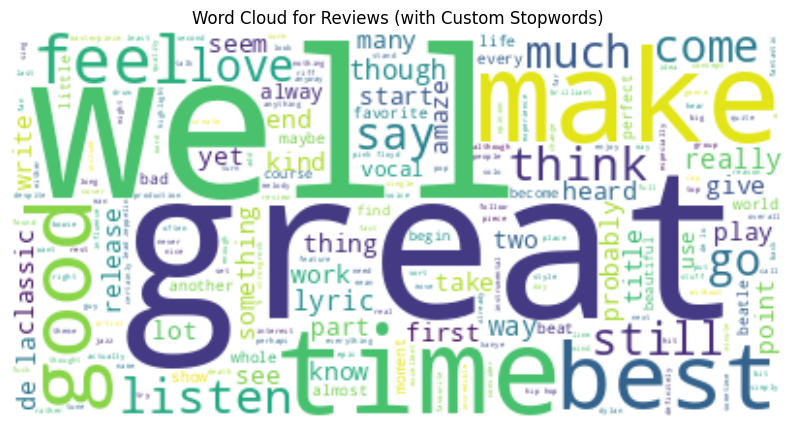

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Convert the elements in the 'Review' column to strings and then join them
all_reviews = ' '.join(df['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)))

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["album", "song", "cd", "music", "songs", "sound","track","band","one","even","record"])

# Create the WordCloud
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews (with Custom Stopwords)')
plt.axis("off")
plt.show()


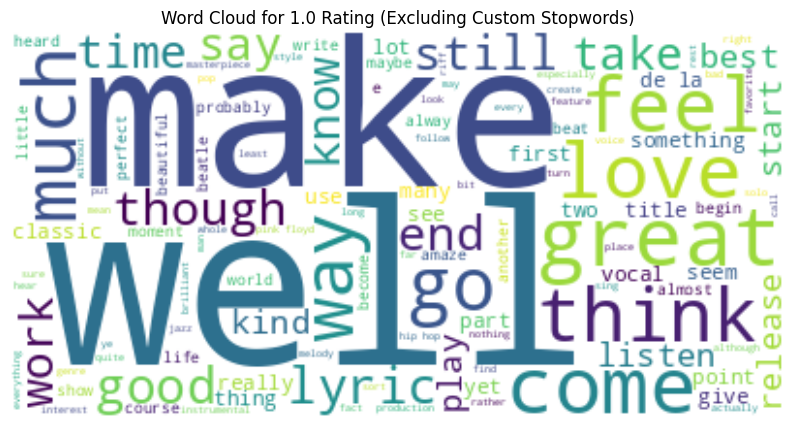

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define a function to preprocess text by removing stopwords
def preprocess_text(text):
    # Create custom stopwords list
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(["album", "song", "cd", "music", "songs", "sound", "track", "band", "one", "even", "record"])

    # Split text into words
    words = text.split()

    # Remove stopwords and return the cleaned text
    cleaned_text = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(cleaned_text)

# Define a function to plot word clouds
def plot_word_cloud(rating):
    # Get reviews for the specified rating
    reviews = df[df['Rating'] == rating]['Review']

    # Combine reviews into a single string
    combined_reviews = ' '.join(df['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)))

    # Preprocess the text by removing stopwords
    cleaned_text = preprocess_text(combined_reviews)

    # Create and display the word cloud
    wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(cleaned_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {rating} Rating (Excluding Custom Stopwords)')
    plt.axis("off")
    plt.show()


plot_word_cloud('1.0')


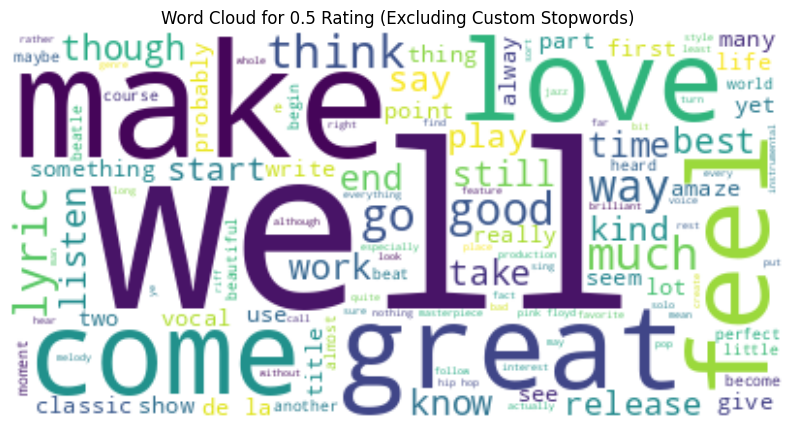

In [33]:
plot_word_cloud('0.5')

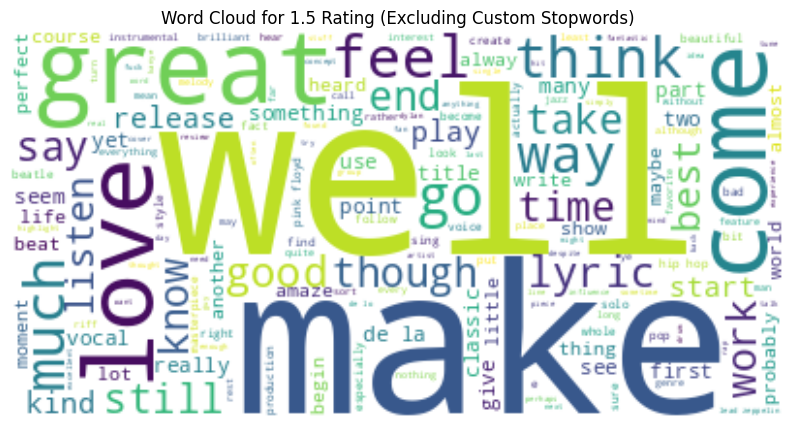

In [34]:
plot_word_cloud('1.5')

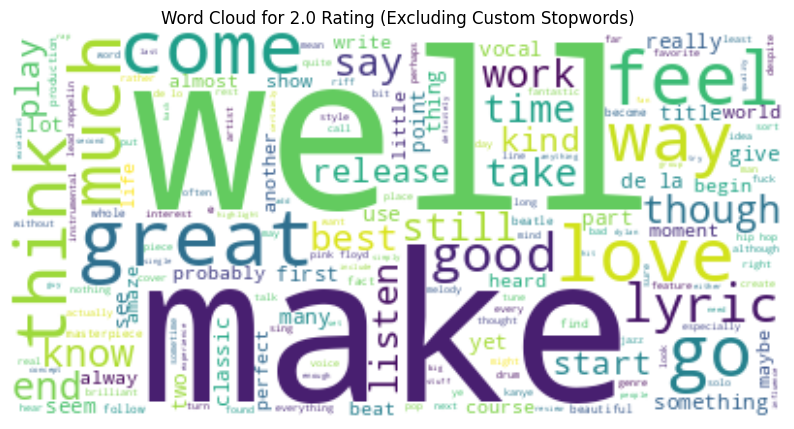

In [35]:
plot_word_cloud('2.0')

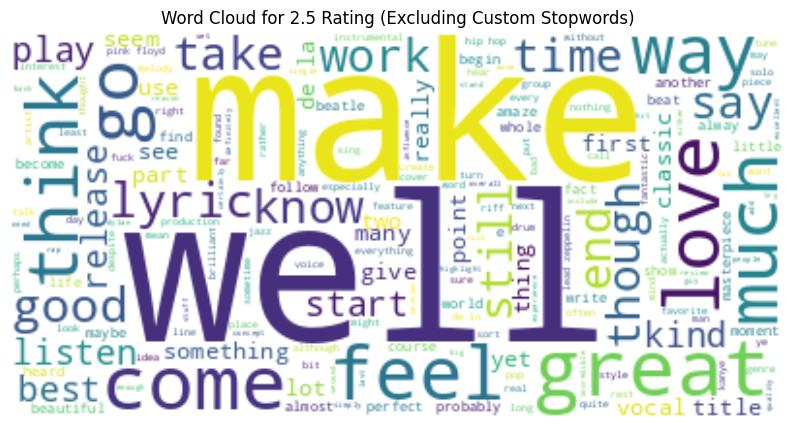

In [36]:
plot_word_cloud('2.5')

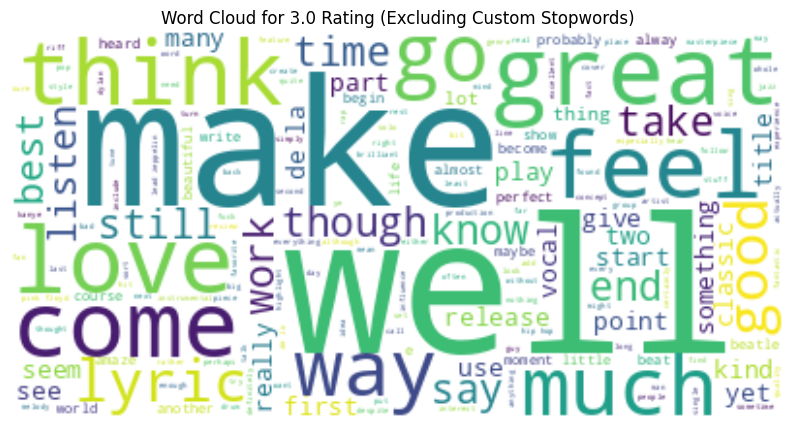

In [37]:
plot_word_cloud('3.0')

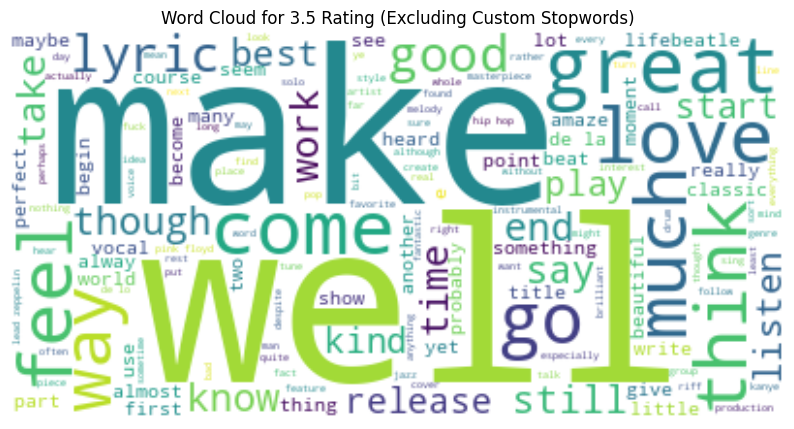

In [38]:
plot_word_cloud('3.5')

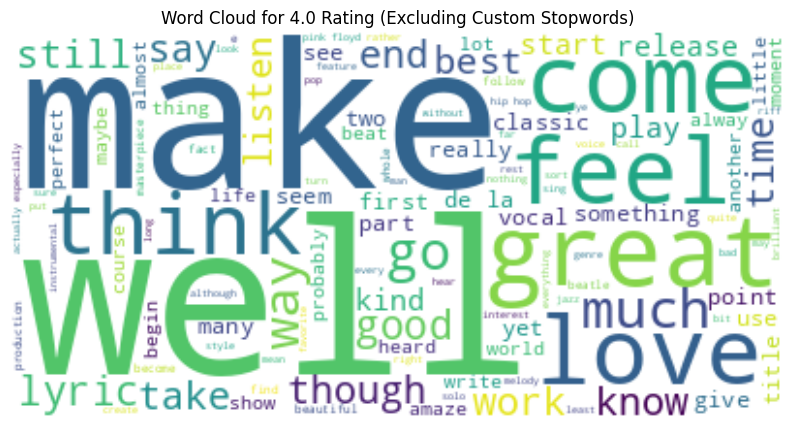

In [39]:
plot_word_cloud('4.0')

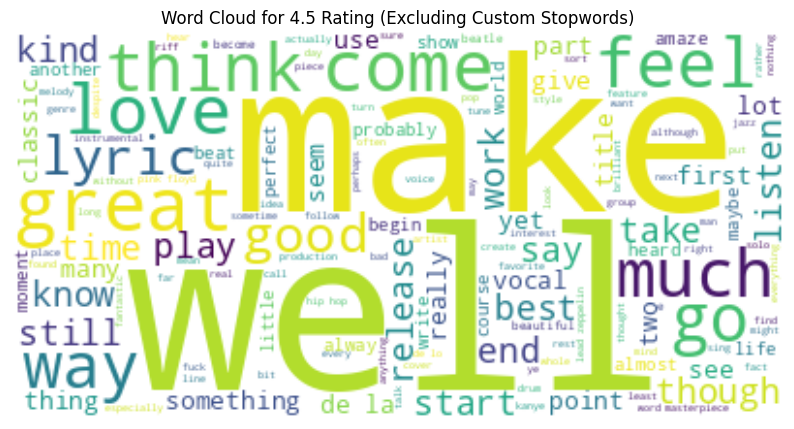

In [40]:
plot_word_cloud('4.5')

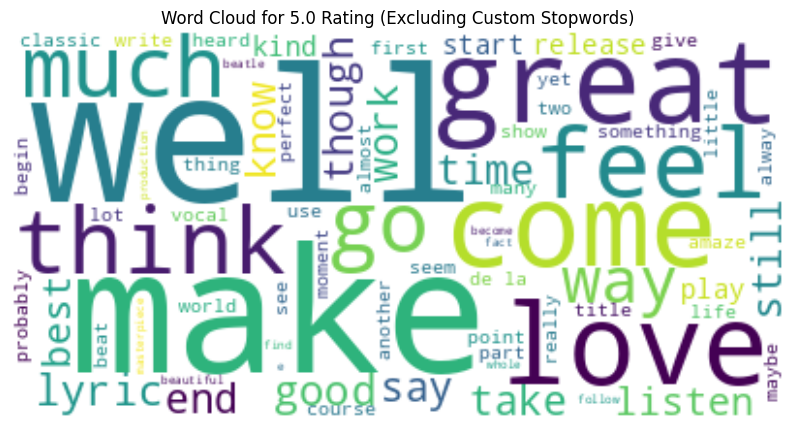

In [41]:
plot_word_cloud('5.0')

In [42]:
from collections import Counter
from wordcloud import STOPWORDS

# Define a function to preprocess text by removing custom stopwords
def preprocess_text(text):
    # Create custom stopwords list
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(["album", "song", "cd", "music", "songs", "sound", "track", "band", "one", "even", "record"])

    # Split text into words
    words = text.split()

    # Remove stopwords and return the cleaned text
    cleaned_text = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(cleaned_text)

In [43]:
def freq(rating, df):
    # Get reviews for the specified rating
    reviews = df[df['Rating'] == rating]['Review']

    # Combine reviews into a single string
    combined_reviews = ' '.join(reviews.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)))

    # Preprocess the text by removing stopwords
    cleaned_text = preprocess_text(combined_reviews)

    # Split the cleaned text into words
    word_list = cleaned_text.split()

    # Calculate word frequencies
    counts = Counter(word_list)

    # Get the top 10 most common words
    top_words = counts.most_common(10)

    return top_words

In [44]:
freq('0.5',df)

[('make', 165),
 ('listen', 163),
 ('de', 163),
 ('bad', 138),
 ('time', 115),
 ('really', 113),
 ('go', 109),
 ('thing', 101),
 ('good', 100),
 ('well', 98)]

In [45]:
freq('1.0',df)

[('de', 247),
 ('make', 215),
 ('time', 215),
 ('listen', 196),
 ('rock', 190),
 ('good', 189),
 ('well', 183),
 ('bad', 182),
 ('really', 179),
 ('much', 169)]

In [46]:
freq('1.5',df)

[('good', 276),
 ('make', 271),
 ('time', 264),
 ('really', 247),
 ('listen', 239),
 ('go', 211),
 ('well', 209),
 ('much', 196),
 ('de', 193),
 ('bad', 190)]

In [47]:
freq('2.0',df)

[('really', 739),
 ('good', 662),
 ('make', 591),
 ('time', 582),
 ('well', 557),
 ('listen', 553),
 ('much', 520),
 ('go', 487),
 ('say', 428),
 ('bad', 416)]

In [48]:
freq('2.5',df)

[('really', 1064),
 ('de', 1032),
 ('good', 931),
 ('time', 918),
 ('listen', 869),
 ('make', 850),
 ('well', 844),
 ('much', 816),
 ('go', 674),
 ('feel', 636)]

In [49]:
freq('3.0',df)

[('really', 2175),
 ('good', 2065),
 ('time', 1892),
 ('de', 1677),
 ('well', 1672),
 ('much', 1635),
 ('make', 1634),
 ('listen', 1622),
 ('great', 1492),
 ('go', 1371)]

In [50]:
freq('3.5',df)

[('good', 3827),
 ('really', 3362),
 ('de', 3157),
 ('time', 3070),
 ('well', 2982),
 ('great', 2790),
 ('make', 2662),
 ('listen', 2526),
 ('much', 2404),
 ('go', 2288)]

In [51]:
freq('4.0',df)

[('de', 9212),
 ('great', 7165),
 ('time', 6664),
 ('really', 6410),
 ('good', 6281),
 ('make', 6009),
 ('well', 5805),
 ('la', 5466),
 ('listen', 5176),
 ('best', 4956)]

In [52]:
freq('4.5',df)

[('de', 12233),
 ('time', 9478),
 ('great', 9371),
 ('make', 8391),
 ('really', 7620),
 ('best', 7590),
 ('well', 7406),
 ('la', 7368),
 ('listen', 6626),
 ('go', 6581)]

In [53]:
freq('5.0',df)

[('de', 21797),
 ('time', 17146),
 ('great', 14510),
 ('best', 13625),
 ('make', 13291),
 ('la', 12582),
 ('que', 11694),
 ('listen', 11594),
 ('rock', 10497),
 ('well', 9991)]

As seen from the word clouds and frequencies above, there is a very similar distribution of common words across all star ratings.

# Predictive Models for Rating

In [54]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=ec1d088ace5cd84e94caebf7c96eee55d8ce2a0039e28a75baa8349b0749c064
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [55]:
!pip install keras
!pip install scikit-learn
!pip install tensorflow

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
# from keras.utils import to_categorical

# X = df['Review']  # Lematized Text data
# y = df['Rating']  # Target variable

# # Label Encoding for Ratings
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Tokenization and Padding
# max_sequence_length = 100
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)
# X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', truncating='post')
# X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# # Define and Compile the CNN Model
# embedding_dim = 100
# vocab_size = len(tokenizer.word_index) + 1

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(5))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for ratings

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Step 4: Train the Model
# epochs = 10  # You can adjust the number of epochs
# batch_size = 32  # You can adjust the batch size

# history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size,
#                     validation_data=(X_test_padded, y_test))

# # Step 5: Evaluate the Model
# loss, accuracy = model.evaluate(X_test_padded, y_test)
# print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
1955/1955 [==============================] - 844s 431ms/step - loss: 1.5161 - accuracy: 0.4058 - val_loss: 1.4657 - val_accuracy: 0.4109
Epoch 2/10
1955/1955 [==============================] - 841s 430ms/step - loss: 1.2383 - accuracy: 0.5157 - val_loss: 1.5483 - val_accuracy: 0.3952
Epoch 3/10
1955/1955 [==============================] - 835s 427ms/step - loss: 0.7345 - accuracy: 0.7298 - val_loss: 2.1585 - val_accuracy: 0.3633
Epoch 4/10
1955/1955 [==============================] - 833s 426ms/step - loss: 0.3582 - accuracy: 0.8764 - val_loss: 3.1929 - val_accuracy: 0.3422
Epoch 5/10
1955/1955 [==============================] - 839s 429ms/step - loss: 0.1977 - accuracy: 0.9362 - val_loss: 4.1345 - val_accuracy: 0.3286
Epoch 6/10
1955/1955 [==============================] - 849s 434ms/step - loss: 0.1380 - accuracy: 0.9560 - val_loss: 5.0493 - val_accuracy: 0.3423
Epoch 7/10
1955/1955 [==============================] - 880s 450ms/step - loss: 0.1174 - accuracy: 0.9618 - val_

In [56]:
from sklearn.preprocessing import LabelEncoder
# Find the minimum number of rows between "Review" and "Rating" columns
min_rows = min(len(df['Review']), len(df['Rating']))

# Trim both columns to have the same number of rows
df['Review'] = df['Review'][:min_rows]
df['Rating'] = df['Rating'][:min_rows]

#Perform Label Encoding
Y = df['Rating'].values
encoder = LabelEncoder()
encoder.fit(Y)
y_encoded = encoder.fit_transform(Y)
y_encoded

array([9, 9, 8, ..., 6, 9, 1])

In [57]:
# from sklearn.preprocessing import OneHotEncoder

# len_star = len(star_labels)

# encoder = OneHotEncoder(sparse=False)
# star_labels = star_labels.reshape((len_star, 1))
# encoder.fit_transform(star_labels)

In [58]:
#Load the GloVe word embeddings
def load_glove_embeddings(embedding_file):
    embeddings_index = {}
    with open(embedding_file, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embedding_file = '/content/glove.6B.100d.txt'  # Update with your GloVe file path
glove_embeddings = load_glove_embeddings(embedding_file)



In [59]:
#Initialize the tokenizer
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # Initialize the tokenizer with a maximum vocabulary size
tokenizer.fit_on_texts(df['Review'])
word_index = tokenizer.word_index

In [60]:
#Tokenize and pad sequences
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X = df['Review']
Y = df['Rating']
max_sequence_length = 100

X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=1000, stratify=Y)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# Pad the sequences to a fixed length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post', truncating='post')



In [61]:
#Map words to GloVe vectors
embedding_dim = 100  # Adjust based on the dimensionality of your GloVe embeddings
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector


In [62]:
# Build and compile the CNN model
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for ratings

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [63]:
# Train the Model
epochs = 10
batch_size = 32

history = model.fit(X_train_padded, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test_padded, Y_test))

# Evaluate the Model
train_loss, train_accuracy = model.evaluate(X_train_padded, Y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, Y_test)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
1832/1832 [==============================] - 797s 434ms/step - loss: 1.5186 - accuracy: 0.4037 - val_loss: 1.4485 - val_accuracy: 0.4245
Epoch 2/10
1832/1832 [==============================] - 824s 450ms/step - loss: 1.2473 - accuracy: 0.5022 - val_loss: 1.5526 - val_accuracy: 0.4112
Epoch 3/10
1832/1832 [==============================] - 793s 433ms/step - loss: 0.8186 - accuracy: 0.6873 - val_loss: 2.1009 - val_accuracy: 0.3671
Epoch 4/10
1832/1832 [==============================] - 791s 432ms/step - loss: 0.4252 - accuracy: 0.8468 - val_loss: 3.1427 - val_accuracy: 0.3600
Epoch 5/10
1832/1832 [==============================] - 794s 433ms/step - loss: 0.2195 - accuracy: 0.9247 - val_loss: 4.1708 - val_accuracy: 0.3613
Epoch 6/10
1832/1832 [==============================] - 786s 429ms/step - loss: 0.1419 - accuracy: 0.9531 - val_loss: 5.0497 - val_accuracy: 0.3500
Epoch 7/10
1832/1832 [==============================] - 785s 429ms/step - loss: 0.1195 - accuracy: 0.9609 - val_

In [82]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(nn):
    acc = nn.history['accuracy']
    val_acc = nn.history['val_accuracy']
    loss = nn.history['loss']
    val_loss = nn.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

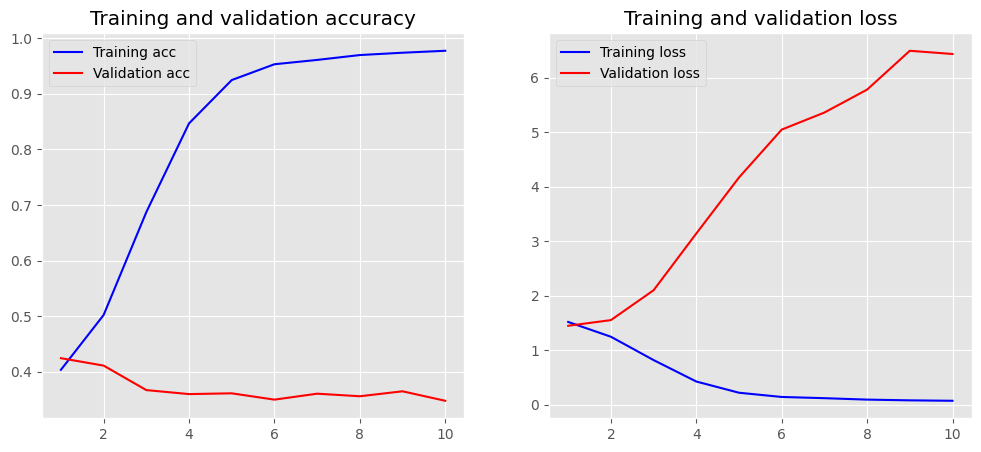

In [83]:
plot_history(history)